In [ ]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()

In [1]:
from protein_graph import *
import matplotlib.pyplot as plt
init()

PyRosetta-4 2019 [Rosetta PyRosetta4.conda.linux.CentOS.python36.Release 2019.19+release.5adc612fd9dee20f808a07e761610d95698b0f35 2019-05-10T09:04:00] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.linux.CentOS.python36.Release r221 2019.19+release.5adc612f 5adc612fd9dee20f808a07e761610d95698b0f35 http://www.pyrosetta.org 2019-05-10T09:04:00
core.init: command: PyRosetta -ex1 -ex2aro -database /home/samuelstentz/.conda/envs/pyrosetta/lib/python3.6/site-packages/pyrosetta/database
core.init: 'RNG device' seed mode, using '/dev/urandom', seed=1835787162 seed_offset=0 real_seed=1835787162
core.init.random: RandomGenerator:init: Normal mode, seed=1835787162 RG_type=mt19937


In [2]:
crystal_structure = r"/mnt/c/Users/Owner/Documents/Code/Research_Scripts/PyRosetta/Graph-Convolutional-Neural-Network/GraphGeneration/CrystalStructures/HCV.pdb"
pose = pose_from_pdb(crystal_structure)
print(pose.sequence())

core.chemical.GlobalResidueTypeSet: Finished initializing fa_standard residue type set.  Created 979 residue types
core.chemical.GlobalResidueTypeSet: Total time to initialize 1.09375 seconds.
core.import_pose.import_pose: File '/mnt/c/Users/Owner/Documents/Code/Research_Scripts/PyRosetta/Graph-Convolutional-Neural-Network/GraphGeneration/CrystalStructures/HCV.pdb' automatically determined to be of type PDB
GSVVIVGRIILSGRGGPITAYAQQTRGLLGCIITSLTGRDKNQVEGEVQIVSTAAQTFLATCINGVCWTVYHGAGTRTIASPKGPVIQMYTNVDQDLVGWPASQGTRSLTPCTCGSSDLYLVTRHADVIPVRRRGDSRGSLLSPRPISYLKGSSGGPLLCPAGHAVGIFRAAVCTRGVAKAVDFIPVENLETTMRSAECTTPCASHL


In [3]:
from pyrosetta import PyMOLMover
pmm = PyMOLMover()
pmm.apply(pose)

In [4]:
ind_sub = index_substrate(pose)
print(ind_sub)
for el in ind_sub:
    print(pose.pdb_info().pose2pdb(el))

[197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207]
1 B 
2 B 
3 B 
4 B 
5 B 
6 B 
7 B 
8 B 
9 B 
10 B 
11 B 


In [5]:
ind_act = index_substrate_active_site(pose, index_p1 = 7, upstream_buffer = 7, downstream_buffer = 1)
print(ind_act)
for el in ind_act:
    print(pose.pdb_info().pose2pdb(el))

[197, 198, 199, 200, 201, 202, 203, 204]
1 B 
2 B 
3 B 
4 B 
5 B 
6 B 
7 B 
8 B 


In [6]:
ind_if = index_interface_nearest_residuewise(pose, ind_act, ind_sub, 10)
print(ind_if)
print(len(ind_if))

[174, 173, 172, 173, 172, 173, 172, 171, 171, 170]
10


In [7]:
%time sfxn = get_fa_scorefxn()
%time sfxn(pose)
%time energies = pose.energies()

core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.scoring.etable: Starting energy table calculation
core.scoring.etable: smooth_etable: changing atr/rep split to bottom of energy well
core.scoring.etable: smooth_etable: spline smoothing lj etables (maxdis = 6)
core.scoring.etable: smooth_etable: spline smoothing solvation etables (max_dis = 6)
core.scoring.etable: Finished calculating energy tables.
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBPoly1D.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBFadeIntervals.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBEval.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/DonStrength.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/AccStrength.csv
basic.io.database: Database file opened: scoring/score_functions/rama/fd/

In [8]:
params = {"amino_acids":False,
            "sinusoidal_encoding":0,
            "cosine_similarity":False,
            "center_measure":False,
            "interface_boolean":False,
            "energy_terms":[fa_intra_sol_xover4, fa_intra_rep, rama_prepro, omega, p_aa_pp, fa_dun, ref],
            "energy_edge_terms":[pro_close, fa_atr, fa_rep, fa_sol, fa_elec, lk_ball_wtd],
            "distance":False,
            "interface_edge":False,
            "hydrogen_bonding":False,
            "covalent_edge":False}
%time g = protein_graph(pose = pose, substrate_indices=ind_act, interface_indices = ind_if, params = params)

core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 14 ms


In [13]:
energy_terms = [fa_intra_sol_xover4, fa_intra_rep, rama_prepro, omega, p_aa_pp, fa_dun, ref]
params = {"amino_acids":True,
                    "sinusoidal_encoding":3,
                    "cosine_similarity":True,
                    "center_measure":True,
                    "interface_boolean":True,
                    "energy_terms":energy_terms,
                    "energy_edge_terms":[],
                    "distance":True,
                    "energy":True}
%time g = protein_graph(pose = pose, substrate_indices=ind_act, interface_indices = ind_if, params = params)

core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 18.3 ms


core.import_pose.import_pose: File './CrystalStructures/HCV.pdb' automatically determined to be of type PDB
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015


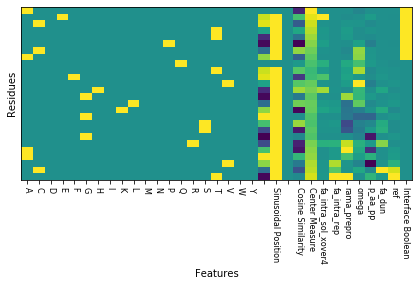

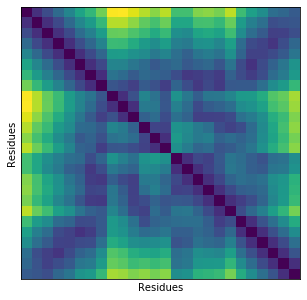

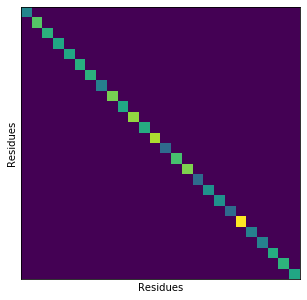

In [38]:
interface = index_interface_8ang_original(pose, ind_act, ind_sub, 10, protease = "./CrystalStructures/HCV.pdb")

g = protein_graph(pose = pose, substrate_indices=ind_act, interface_indices = interface, params = params)

fig, ax = plt.subplots()
ax.imshow(g.V, cmap='viridis', aspect='auto')
ax.set_xlabel("Features")
ax.set_ylabel("Residues")    
xlab = list("ACDEFGHIKLMNPQRSTVWY")+["", "Sinusoidal Position", "", "Cosine Similarity", "Center Measure"]
xlab += [str(t).split(".")[1] for t in energy_terms] + ["Interface Boolean"]
ax.set_xticks(range(g.V.shape[1]))
ax.set_xticklabels(xlab, rotation=-90, fontdict = {'fontsize': 8})
ax.set_yticks([])
fig.set_size_inches(5 * 1.4, 5)
plt.gcf().subplots_adjust(bottom=.4)
plt.savefig("nodefeat.png", format="png", dpi=1000, transparent = True)
plt.show()

for m in range(g.A.shape[2]):
    fig, ax = plt.subplots()
    ax.imshow(g.A[:,:,m], cmap='viridis', aspect='auto')
    ax.figsize=(10,10)
    ax.set_xlabel("Residues")
    ax.set_ylabel("Residues")    
    ax.set_xticks([])
    ax.set_yticks([])
    fig.set_size_inches(5, 5)
    plt.savefig(f"edgefeat{m}.png", format="png", dpi=1000, transparent = True)
    plt.show()

In [19]:
#ind_if_1 = index_interface_10ang_original(pose, ind_act, ind_sub, 10, protease = "./CrystalStructures/HCV.pdb")
print(ind_if_1)
print(len(ind_if_1))
for el in ind_if_1:
    print(pose.pdb_info().pose2pdb(el))

NameError: name 'ind_if_1' is not defined

In [ ]:
params = {"amino_acids":True,
            "sinusoidal_encoding":1,
            "cosine_similarity":True,
            "center_measure":True,
            "energy_terms":[fa_rep, fa_sol],
            "energy":True,
            "interface_boolean":True}
g = protein_graph(pose = pose, substrate_indices=ind_act, interface_indices = ind_if, params = params)
print(g.A.shape)

fig, ax = plt.subplots()
ax.imshow(g.V, cmap='viridis', aspect='auto')
plt.show()

fig, ax = plt.subplots()
ax.imshow(g.A, cmap='viridis', aspect='auto')
plt.show()

In [ ]:
params = {"amino_acids":False,
          "blosum": True,
            "sinusoidal_encoding":0,
            "cosine_similarity":False,
            "center_measure":False,
            "energy_terms":[],
            "edge_feature":"Energy",
            "interface_boolean":False}
g = protein_graph(pose = pose, substrate_indices=ind_act, interface_indices = ind_if, params = params)

fig, ax = plt.subplots()
ax.imshow(g.V, cmap='viridis', aspect='auto')
plt.show()

fig, ax = plt.subplots()
ax.imshow(g.A, cmap='viridis', aspect='auto')
plt.show()

In [ ]:
mat = "blosum62.txt"
all_amino_acids = "ACDEFGHIKLMNPQRSTVWY"

with open(mat) as fh:
    ls = fh.readlines()

with open("blosum.txt", "w") as fh:
    for el in ls:
        el = el.replace("    ", " ")
        el = el.replace("   ", " ")
        el = el.replace("  ", " ")
        fh.write(el)

df = pd.read_csv("blosum.txt", sep = " ", index_col = 0)

In [2]:
from pyrosetta import *; init('-mute core')
from pyrosetta.rosetta.core.simple_metrics.metrics import RMSDMetric
from pyrosetta.rosetta.core.select.residue_selector import ChainSelector

pose_ls = []
for pose in poses_from_silent("../../HCV/AAAA__C.ASHL/AAAA__C.ASHL"):
    pose_ls.append(pose)

PyRosetta-4 2019 [Rosetta PyRosetta4.conda.linux.CentOS.python36.Release 2019.19+release.5adc612fd9dee20f808a07e761610d95698b0f35 2019-05-10T09:04:00] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


In [7]:
for i,p in enumerate(pose_ls):
    p.dump_pdb(f"threaded_pose_{i}.pdb")

In [ ]:
ref_pose=pose_from_pdb(r"/mnt/c/Users/Owner/Documents/Code/Research_Scripts/PyRosetta/Graph-Convolutional-Neural-Network/GraphGeneration/CrystalStructures/HCV.pdb")
rmm = RMSDMetric(ref_pose,ChainSelector('B'))

In [ ]:
rmsd_ls = []
for pose in pose_ls:
    rmsd_ls.append(rmm.calculate(pose))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.hist(rmsd_ls, normed=True, bins=10)
plt.ylabel('frequency')

In [ ]:
for i, r in enumerate(rmsd_ls):
    if r >= 1:
        print(pose_ls[i].sequence())
        print(r)

In [ ]:
pmm = PyMOLMover()
pmm.apply(pose_ls[254])

In [ ]:
amino_acids = set(list(pose.sequence()))
types = set()
for i in range(1, len(pose.sequence()) + 1):
    res = pose.residue(i)
    for atom_index in range(1, res.natoms() + 1):
        types.add(res.atom_name(atom_index))
dictionary = dict()
for t in types:
    tclean = t.strip()
    for i in range(10):
        tclean = tclean.replace(str(i),"")
    c1 = tclean[0]
    if c1 == "N":
        dictionary[t] = 14.007
    elif c1 == "O":
        dictionary[t] = 15.999
    elif c1 == "C":
        dictionary[t] = 12.011
    elif c1 == "H":
        dictionary[t] = 1.008
    elif c1 == "S":
        dictionary[t] = 32.06
    else:
        print("failure!")

In [ ]:
import pprint
print(dictionary)